# Testing oscillatory response

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

In [2]:
def R(t, S1, S2, S3, l1, p, q):
    return S1*(1-np.exp(l1*t)) + S2*(1-np.exp(p*t)*(np.cos(q*t)+np.sin(q*t))) + S3*(1-np.exp(p*t)*(np.cos(q*t)-np.sin(q*t)))
def oscpart1(t, S2, p, q):
    return S2*(1-np.exp(p*t)*(np.cos(q*t)+np.sin(q*t)))
def oscpart2(t, S3, p, q):
    return S3*(1-np.exp(p*t)*(np.cos(q*t)-np.sin(q*t)))
def osc_sum(t, S2, S3, p, q):
    return S2*(1-np.exp(p*t)*(np.cos(q*t)+np.sin(q*t)))+S3*(1-np.exp(p*t)*(np.cos(q*t)-np.sin(q*t)))

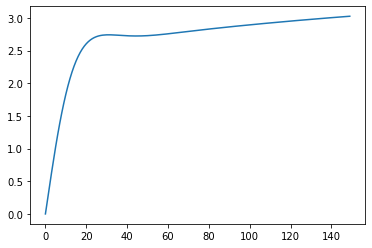

In [3]:
plt.plot(R(np.arange(0,150,1), S1 = 1, S2=1.5, S3=1, l1 = -1/200, p=-1/10, q=2*np.pi/70))


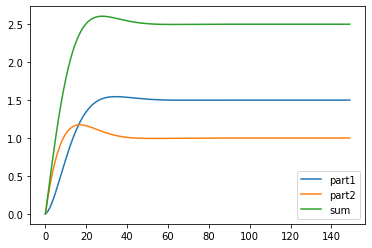

In [4]:
plt.plot(oscpart1(np.arange(0,150,1), S2=1.5, p=-1/10, q=2*np.pi/70), label = 'part1')
plt.plot(oscpart2(np.arange(0,150,1), S3=1, p=-1/10, q=2*np.pi/70), label = 'part2')
plt.plot(osc_sum(np.arange(0,150,1), S2=1.5, S3=1, p=-1/10, q=2*np.pi/70), label = 'sum')
plt.legend()

## Linearly increasing forcing:

In [5]:
from sympy import *
x, t, s, p, q, l = symbols('x, t, s, p, q, l')
init_printing(use_unicode=True)


In [6]:
integral1 = integrate(exp(l*s)*s, (s, 0, t))
integral2 = integrate(exp(p*s)*s*sin(q*s), (s, 0, t))
integral3 = integrate(exp(p*s)*s*cos(q*s), (s, 0, t))


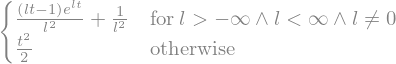

In [7]:
integral1

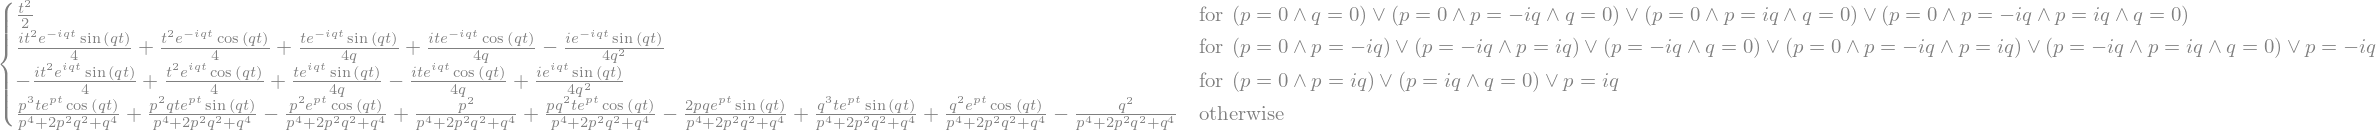

In [8]:
integral3

In [9]:
int_t1 = integral1.subs([(l,-1/200)])
int_t2 = integral2.subs([(p,-1/10), (q,2*np.pi/70)])
int_t3 = integral3.subs([(p,-1/10), (q,2*np.pi/70)])


In [10]:
int_t1

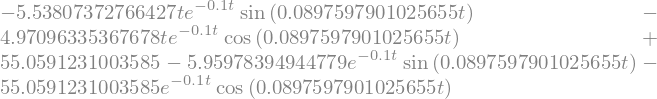

In [11]:
int_t2

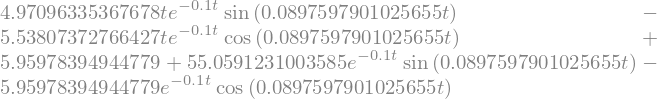

In [12]:
int_t3

In [13]:
int_table1 = np.array([int_t1.subs(t,ti) for ti in range(150)])
int_table2 = np.array([int_t2.subs(t,ti) for ti in range(150)])
int_table3 = np.array([int_t3.subs(t,ti) for ti in range(150)])

In [14]:
S1 = 1; S2 = 1.5; S3 = 1

In [15]:
k1 = (-S1*l).subs(l, -1/200)  #S1 = - k1/l1

In [16]:
k1

In [17]:
k1 = (-S1*l).subs(l, -1/200)  #S1 = - k1/l1
k2 = (-S2/p).subs(p, -1/10) # A = -k2*p = S2
k3 = (S3/q).subs(q, 2*np.pi/70) # B = k3*q = S3

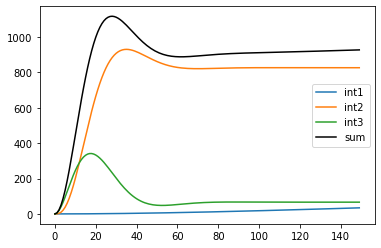

In [18]:
plt.plot(int_table1*k1, label = 'int1')
plt.plot(int_table2*k2, label = 'int2')
plt.plot(int_table3*k3, label = 'int3')
plt.plot(int_table1*k1+int_table2*k2 + int_table3*k3, 'black', label ='sum')
plt.legend()